# Ciberseguridad

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Test.txt to Test.txt
Saving Train.txt to Train.txt


In [ ]:
import pandas as pd

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [ ]:
import matplotlib.pyplot as plt

## Carga los datos en pandas

In [ ]:
header=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land",
"wrong_fragment","urgent","hot","num_failed_logins","logged_in",
"num_compromised","root_shell","su_attempted","num_root","num_file_creations",
"num_shells","num_access_files","num_outbound_cmds","is_host_login",
"is_guest_login","count","srv_count","serror_rate", "srv_serror_rate",
"rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate",
"srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate",
"dst_host_diff_srv_rate","dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
"dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]


In [ ]:
train_df = pd.read_csv("Train.txt",header=None)
test_df = pd.read_csv('Test.txt',header=None)

In [ ]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [ ]:
test_df.columns=header
test_df.keys()

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack', 'last_flag'],
      dtype='object')

In [ ]:
test_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [ ]:
train_df.columns=header
train_df.keys()

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack', 'last_flag'],
      dtype='object')

In [ ]:
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


### Análisis exploratorio

In [ ]:
duration = list(train_df['duration'])

In [ ]:
import matplotlib.pyplot as plt

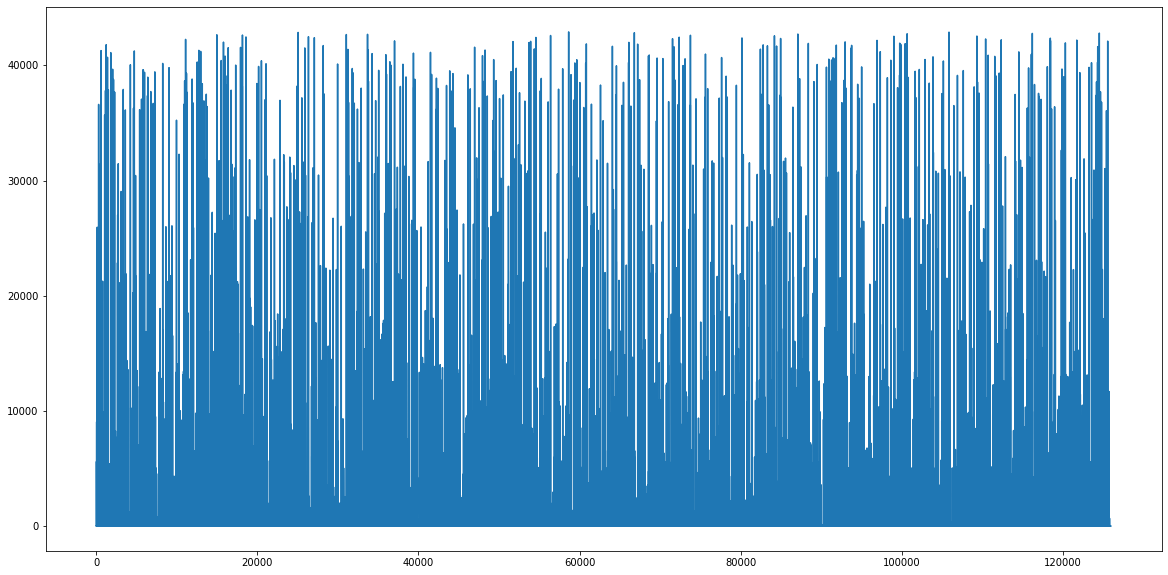

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(duration)

In [ ]:
protocol_type = list(train_df['protocol_type'])
unic_protocol = set(protocol_type)
dic_num_protocol = {}
for protocol in unic_protocol:
  dic_num_protocol[protocol] = 0
for protocol in protocol_type:
  dic_num_protocol[protocol] += 1

In [ ]:
dic_num_protocol

{'icmp': 8291, 'tcp': 102689, 'udp': 14993}

In [ ]:
flags = list(train_df['flag'])
unic_flag = set(flags)
dic_num_flags = {}
for protocol in unic_flag:
  dic_num_flags[protocol] = 0
for protocol in flags:
  dic_num_flags[protocol] += 1

In [ ]:
dic_num_flags

{'OTH': 46,
 'REJ': 11233,
 'RSTO': 1562,
 'RSTOS0': 103,
 'RSTR': 2421,
 'S0': 34851,
 'S1': 365,
 'S2': 127,
 'S3': 49,
 'SF': 74945,
 'SH': 271}

In [ ]:
services = list(train_df['service'])
unic_service = set(services)
dic_num_services = {}
for protocol in unic_service:
  dic_num_services[protocol] = 0
for protocol in services:
  dic_num_services[protocol] += 1

In [ ]:
dic_num_services

{'IRC': 187,
 'X11': 73,
 'Z39_50': 862,
 'aol': 2,
 'auth': 955,
 'bgp': 710,
 'courier': 734,
 'csnet_ns': 545,
 'ctf': 563,
 'daytime': 521,
 'discard': 538,
 'domain': 569,
 'domain_u': 9043,
 'echo': 434,
 'eco_i': 4586,
 'ecr_i': 3077,
 'efs': 485,
 'exec': 474,
 'finger': 1767,
 'ftp': 1754,
 'ftp_data': 6860,
 'gopher': 518,
 'harvest': 2,
 'hostnames': 460,
 'http': 40338,
 'http_2784': 1,
 'http_443': 530,
 'http_8001': 2,
 'imap4': 647,
 'iso_tsap': 687,
 'klogin': 433,
 'kshell': 299,
 'ldap': 410,
 'link': 475,
 'login': 429,
 'mtp': 439,
 'name': 451,
 'netbios_dgm': 405,
 'netbios_ns': 347,
 'netbios_ssn': 362,
 'netstat': 360,
 'nnsp': 630,
 'nntp': 296,
 'ntp_u': 168,
 'other': 4359,
 'pm_dump': 5,
 'pop_2': 78,
 'pop_3': 264,
 'printer': 69,
 'private': 21853,
 'red_i': 8,
 'remote_job': 78,
 'rje': 86,
 'shell': 65,
 'smtp': 7313,
 'sql_net': 245,
 'ssh': 311,
 'sunrpc': 381,
 'supdup': 544,
 'systat': 477,
 'telnet': 2353,
 'tftp_u': 3,
 'tim_i': 8,
 'time': 654,
 '

### Cambio de strings por números

In [ ]:
unic_protocol
dic_protocol2number = {}
dic_number2protocol = {}
for i,protocol in enumerate(unic_protocol):
  dic_protocol2number[protocol]=i
  dic_number2protocol[i] = protocol
dic_number2protocol


{0: 'tcp', 1: 'udp', 2: 'icmp'}

In [ ]:
unic_service

unic_service
dic_service2number = {}
dic_number2service = {}
for i,service in enumerate(unic_service):
  dic_service2number[service]=i
  dic_number2service[i] = service
dic_number2service

{0: 'netbios_ssn',
 1: 'IRC',
 2: 'remote_job',
 3: 'telnet',
 4: 'urp_i',
 5: 'domain_u',
 6: 'ftp_data',
 7: 'nntp',
 8: 'uucp_path',
 9: 'tftp_u',
 10: 'shell',
 11: 'other',
 12: 'efs',
 13: 'echo',
 14: 'bgp',
 15: 'ftp',
 16: 'daytime',
 17: 'systat',
 18: 'sql_net',
 19: 'red_i',
 20: 'discard',
 21: 'supdup',
 22: 'http_2784',
 23: 'hostnames',
 24: 'iso_tsap',
 25: 'auth',
 26: 'http',
 27: 'netstat',
 28: 'pop_2',
 29: 'printer',
 30: 'http_443',
 31: 'ntp_u',
 32: 'netbios_dgm',
 33: 'private',
 34: 'eco_i',
 35: 'sunrpc',
 36: 'mtp',
 37: 'klogin',
 38: 'uucp',
 39: 'nnsp',
 40: 'urh_i',
 41: 'ldap',
 42: 'exec',
 43: 'courier',
 44: 'harvest',
 45: 'pop_3',
 46: 'whois',
 47: 'smtp',
 48: 'login',
 49: 'rje',
 50: 'imap4',
 51: 'domain',
 52: 'ecr_i',
 53: 'time',
 54: 'X11',
 55: 'ctf',
 56: 'http_8001',
 57: 'finger',
 58: 'link',
 59: 'ssh',
 60: 'Z39_50',
 61: 'netbios_ns',
 62: 'pm_dump',
 63: 'aol',
 64: 'name',
 65: 'vmnet',
 66: 'kshell',
 67: 'tim_i',
 68: 'csnet_

In [ ]:
unic_flag

unic_flag
dic_flag2number = {}
dic_number2flag = {}
for i,flag in enumerate(unic_flag):
  dic_flag2number[flag]=i
  dic_number2flag[i] = flag
dic_number2flag

{0: 'S1',
 1: 'OTH',
 2: 'RSTR',
 3: 'S2',
 4: 'S0',
 5: 'S3',
 6: 'RSTO',
 7: 'SF',
 8: 'REJ',
 9: 'RSTOS0',
 10: 'SH'}

In [ ]:
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


## Division de los datos

In [ ]:
model_input = list(train_df)
model_input.remove('attack')
model_input.remove('protocol_type')
model_input.remove('flag')
model_input.remove('service')

x_train, y_train = train_df[model_input],train_df['attack']

In [ ]:
y_train
y_train_numbers = []
for y in y_train:
  if(y=='normal'):
    y_train_numbers.append(1)
  else:
    y_train_numbers.append(0)


In [ ]:
x_train.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag
0,0,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20
1,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19
3,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21
4,0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21


In [ ]:
len(model_input)

39

In [ ]:
len(protocol_type)

125973

In [ ]:
for i in range(len(protocol_type)):
  protocol_type[i]=dic_protocol2number[protocol_type[i]]

for i in range(len(flags)):
  flags[i]=dic_flag2number[flags[i]]

for i in range(len(services)):
  services[i]=dic_service2number[services[i]]



In [ ]:
x_train['protocol_type'] = protocol_type
x_train['service'] = services
x_train['flag'] = flags

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
protocol_type[:10]

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
x_train.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag,protocol_type,service,flag
0,0,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20,0,6,7
1,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,1,11,7
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19,0,33,4
3,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21,0,26,7
4,0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,0,26,7


## Construcción del modelo

In [ ]:
from tensorflow import keras

In [ ]:
len_input = len(x_train.keys())
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(len_input,)),
	keras.layers.Dense(100, activation=tf.nn.relu),
  keras.layers.Dropout(rate=0.1),
  keras.layers.Dense(200, activation=tf.nn.sigmoid),
  keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])
opt = keras.optimizers.Adam(learning_rate=0.0009)
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
import numpy as np
y_train_numbers = np.array(y_train_numbers)

In [ ]:
test_accuracy = []

In [ ]:
best = test_accuracy[-1]

In [ ]:
for i in range(50):
  model.fit(x_train, y_train_numbers, epochs=3, batch_size=250, validation_split=0.1)
  result = model.evaluate(x_test, y_test_numbers, batch_size=50, verbose=1)
  test_accuracy.append(result[1])
  if(test_accuracy[-1]>best):
    best = test_accuracy[-1]
    t = time.time()
    export_path_keras = "./{}.h5".format(int(t))
    print(export_path_keras)
    model.save(export_path_keras)

Epoch 1/3
454/454 [==============================] - 2s 4ms/step - loss: 0.0110 - accuracy: 0.9975 - val_loss: 0.0120 - val_accuracy: 0.9974
Epoch 2/3
454/454 [==============================] - 2s 5ms/step - loss: 0.0109 - accuracy: 0.9975 - val_loss: 0.0111 - val_accuracy: 0.9975
Epoch 3/3
451/451 [==============================] - 1s 1ms/step - loss: 1.2022 - accuracy: 0.7944
Epoch 1/3
454/454 [==============================] - 3s 7ms/step - loss: 0.0111 - accuracy: 0.9973 - val_loss: 0.0114 - val_accuracy: 0.9972
Epoch 2/3
454/454 [==============================] - 3s 6ms/step - loss: 0.0111 - accuracy: 0.9972 - val_loss: 0.0115 - val_accuracy: 0.9968
Epoch 3/3
451/451 [==============================] - 0s 994us/step - loss: 1.3068 - accuracy: 0.7990
Epoch 1/3
454/454 [==============================] - 2s 4ms/step - loss: 0.0110 - accuracy: 0.9972 - val_loss: 0.0113 - val_accuracy: 0.9971
Epoch 2/3
454/454 [==============================] - 2s 4ms/step - loss: 0.0134 - accuracy: 0.9

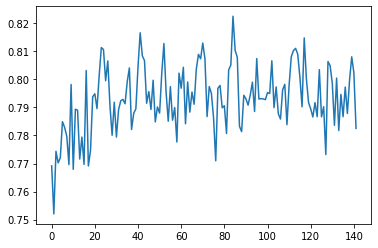

In [ ]:
plt.plot(test_accuracy)

### Test data


In [ ]:
model_input = list(test_df)
model_input.remove('attack')
model_input.remove('protocol_type')
model_input.remove('flag')
model_input.remove('service')

x_test, y_test = test_df[model_input],test_df['attack']

In [ ]:
x_test
len(y_test)

22544

In [ ]:
protocol_type = list(test_df['protocol_type'])
services = list(test_df['service'])
flags = list(test_df['flag'])

for i in range(len(protocol_type)):
  protocol_type[i]=dic_protocol2number[protocol_type[i]]

for i in range(len(flags)):
  flags[i]=dic_flag2number[flags[i]]

for i in range(len(services)):
  services[i]=dic_service2number[services[i]]

x_test['protocol_type'] = protocol_type
x_test['service'] = services
x_test['flag'] = flags

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [ ]:
x_test.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag,protocol_type,service,flag
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,21,0,33,8
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,21,0,33,8
2,2,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,21,0,6,7
3,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,15,2,34,7
4,1,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,11,0,3,6


In [ ]:
x_train.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag,protocol_type,service,flag
0,0,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20,0,6,7
1,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,1,11,7
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19,0,33,4
3,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21,0,26,7
4,0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,0,26,7


In [ ]:
y_test_numbers = []
for y in y_test:
  if(y=='normal'):
    y_test_numbers.append(1)
  else:
    y_test_numbers.append(0)
y_test_numbers = np.array(y_test_numbers)

In [ ]:
len(y_test)
len(y_test_numbers)

22544

In [ ]:
data = model.evaluate(x_test, y_test_numbers, batch_size=90, verbose=1)

251/251 [==============================] - 0s 1ms/step - loss: 1.2237 - accuracy: 0.7825


In [ ]:
data[1]

0.7814052700996399

TypeError: ignored

In [ ]:
import time
t = time.time()

export_path_keras = "./{}.h5".format(int(t))
print(export_path_keras)

model.save(export_path_keras)

./1603401020.h5


In [ ]:
!ls

1603400451.h5  1603400752.h5  1603401020.h5  sample_data  Test.txt  Train.txt


In [ ]:
for i in range(50):
  model.fit(x_train, y_train_numbers, epochs=3, batch_size=150, validation_split=0.1)
  result = model.evaluate(x_test, y_test_numbers, batch_size=50, verbose=1)
  test_accuracy.append(result[1])

Epoch 1/3
756/756 [==============================] - 3s 3ms/step - loss: 0.2243 - accuracy: 0.9424 - val_loss: 0.1550 - val_accuracy: 0.9604
Epoch 2/3
756/756 [==============================] - 2s 3ms/step - loss: 0.1407 - accuracy: 0.9615 - val_loss: 0.1297 - val_accuracy: 0.9630
Epoch 3/3
451/451 [==============================] - 0s 944us/step - loss: 0.7728 - accuracy: 0.7441
Epoch 1/3
756/756 [==============================] - 2s 3ms/step - loss: 0.1100 - accuracy: 0.9676 - val_loss: 0.1119 - val_accuracy: 0.9677
Epoch 2/3
756/756 [==============================] - 2s 3ms/step - loss: 0.1102 - accuracy: 0.9671 - val_loss: 0.1035 - val_accuracy: 0.9687
Epoch 3/3
451/451 [==============================] - 0s 939us/step - loss: 0.8202 - accuracy: 0.7603
Epoch 1/3
756/756 [==============================] - 2s 3ms/step - loss: 0.0958 - accuracy: 0.9725 - val_loss: 0.0937 - val_accuracy: 0.9748
Epoch 2/3
756/756 [==============================] - 2s 3ms/step - loss: 0.0902 - accuracy: 0